<h1> Module 6 Submission </h1>
<h2> Machine Learning and Data Mining</h2>
<h3 style="margin-top: 10px;" > Stephen Eades </h3>

<p> 7/17/2020 </p>

<h4> Twitter </h4>

<ol>
    <li> Collect real-time data using a search term that you are interested in
    </li>
    <li> Choose one specific field in the collect tweets to describe and analyze the data. Use proper plots and write a paragraph in your notebook to report what you found.  The “map-of-a-tweet.png” provides a description of the data fields in tweet.
    </li>
</ol>

<strong>Submission:</strong> You will export your notebook to both .html and .py formats. You will submit the following 2 files to Blackboard. In your html file, you should include all the outputs of your python script without error messages.

<ol>
    <li> Firstname_Lastname_Visualization.zip  (zip the .html and .ipynb files) </li>
    <li> Firstname_Lastname_Twitter.zip  (zip the .html and .ipynb files) </li>
</ol>

<strong>Attachments:</strong> 

<ol>
    <li>
    Sample_plot_result.png: Sample plot
    </li>
    <li>
    Outlier_function.png: Sample input and output of the find_outlier() function
    </li>
    <li>
    Map-of-a-tweet.png: Description of data fields in twitter tweets
    </li>
    <li>
Assignment 6(1).pdf
    </li>
</ol>

In [5]:
import pandas as pd
import scipy as sc

from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

import numpy as np
import seaborn as sns

In [6]:
APP_KEY = 'TyP295WpbRtNFEflSBEHsGqIZ'
APP_SECRET = 'A66O28uKmuL03dvzROq50w4HK7i5BYqjyd65R9hn7RwkVPER9Z'
OAUTH_TOKEN = '42349929-XiMvZDUHwXXT2Ykmk0jJmKDJ3b4h5gW6RKBBRXkw0'
OAUTH_TOKEN_SECRET = 'PZsn5ddtgFEnrSeDwVVHmbQ1yLUJekwg1PzKafUW3R3H5'

twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [8]:
# *** NOTE ***
# While attempting to use Twython Streamer, it appears it was 
# not functioning properly for me, but returned no errors. It 
# simply ran until I manually stopped the kernel. Checking 
# Twitter's status page, it appeared the API was experiencing
# some issues (7/17). In order to complete this, I decided
# to simply use the basic Twython twitter.search() functionality.

# Find tweets concerning potential presidential candidates
trump_search = twitter.search(q='trump')
biden_search = twitter.search(q='biden')
kanye_search = twitter.search(q='kanye')

# Helper function to convert tweet results into list
def create_list_from_results(search_results):
    
    list = []
    for i in range(len(search_results['statuses'])):
        list.append(search_results['statuses'][i]['user']['friends_count'])
    
    return list

# Helper function to find average followers of each list
def find_list_average_followers(list):
    
    sum = 0
    for i in range(len(list)):
        sum = sum + list[i]
    
    return sum/len(list)

In [192]:
# Use helper function to turn tweet results into lists
trump_list = create_list_from_results(trump_search)
biden_list = create_list_from_results(biden_search)
kanye_list = create_list_from_results(kanye_search)

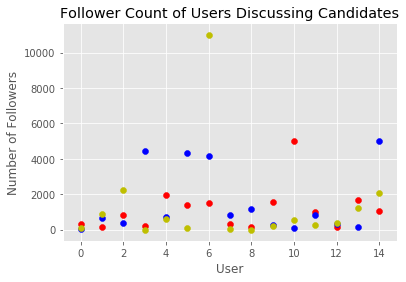

In [234]:
# Using the 15 most recent tweets in each list
# we plot the follower count for each user in the list
plt.scatter(np.arange(15), trump_df, color="r")
plt.scatter(np.arange(15), biden_df, color="b")
plt.scatter(np.arange(15), kanye_df, color="y")

# Style the chart appropriately
plt.title('Follower Count of Users Discussing Candidates')
plt.xlabel('User')
plt.ylabel('Number of Followers')
    
plt.show() 

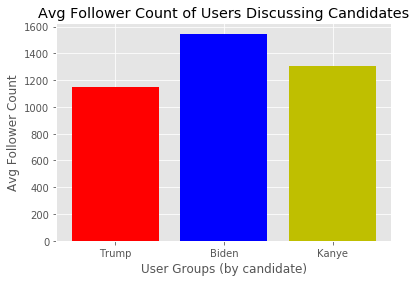

In [229]:
# Find the average follow count of users tweeting about candidates
trump_average = find_list_average_followers(trump_df)
biden_average = find_list_average_followers(biden_df)
kanye_average = find_list_average_followers(kanye_df)

# Plot the averages on a bar chart
plt.bar(["Trump"], trump_average, color="r")
plt.bar(["Biden"], biden_average, color="b")
plt.bar(["Kanye"], kanye_average, color="y")

# Style the chart appropriately
plt.title('Avg Follower Count of Users Discussing Candidates')
plt.xlabel('User Groups (by candidate)')
plt.ylabel('Avg Follower Count')
plt.show()

<h3>Findings</h3>
<h4> Analyzing follower counts of Random Users Tweeting about Presidential Candidates </h4>
<div style="top-margin: 10px;">
    <p> I decided to pull tweets based on one of three candidate names. Trump, Biden, or Kanye. I'm not sure Kanye is even eligble to run, but I thought it would make the results a bit more fun. Plus his name is all over Twitter, all the time.
    </p>
</div>
<img src="follower_banner.png"/>
<p>
    I was curious about the follower count of those who tweet about each candidate. This was pretty surface level stuff considering that a tweet containing a candidates name could be a compliment or a critique. So it is more a measure of the "frequency of their names in recent tweets" i.e. who is trending on Twitter.
    <br>
    <br>
    After getting the candidates search results from twitter, I used a helper function to create lists from those results. These lists were simply the follower counts of the 45 users (15 per candidate) who had their tweets gathered from my Twitter keyword search. The array looked something like [940, 709, 1309, etc.]
    <br>
    <br>
    I made a scatter plot, but it didn't show much and just gave an initial idea of what the numbers looked like on a individual user basis. I could quickly see there was a user with 10,000+ followers who tweeted about Kanye, this was a clear outlier. Biden seemed to have a few users with a significant follower count, but it was too close to be certain. The scatter plot was definitely not the best way to look at this data.
    <br>
    <br>
    I thought finding the averages would be more visually appealing to plot, so I used another helper function to calculate the average follower count of each candidate user group. Using a bar graph, you can see of the collected users (45 total, 15 per candidate) that those tweeting about Biden had a higher average follower count (~1550). Users tweeting about Kanye were second highest (~1300) followed by users tweeting about Trump (~1150). 
    <br>
    <br>
    This again doesn't mean much since it was just 15 tweets. But it was cool to see how to use data like this gathered from Twitter to create interesting visuals to gain new perspectives on the results. 
</p>

    
    